In [16]:

from collections import namedtuple

from sympy import zeros

TraceItem = namedtuple("TraceItem", "component state")
inner_states = ("operational", "degrading", "unresponsive")

with open("states.csv", "r") as file_content:
    components = tuple(eval(file_content.read()))
    states = tuple(TraceItem(component, inner_state) for component in components for inner_state in inner_states)

with open("traces-30.txt", "r") as file_content:
    vocabulary = eval(file_content.read())

transition_probabilities = zeros(len(states))

emission_probabilities = zeros(len(states), 1)

state_probability_distribution = zeros(len(states), 1)

emission_probabilities

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

C:\Users\Finn\AppData\Local\Temp\ipykernel_2904\3754804545.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Finn\AppData\Local\Temp\ipykernel_2904\3754804545.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Model #0	Score: -19847.667550011087
Model #1	Score: -18112.010882505958
Model #2	Score: -19988.16794644679
Model #3	Score: -20060.330352698435
Model #4	Score: -19833.087600289116
Model #5	Score: -19050.07175107413
Model #6	Score: -23877.11505631097
Model #7	Score: -20279.609734139176
Model #8	Score: -23929.51052839166
Model #9	Score: -18358.280068583936
Model #10	Score: -19965.942228960317
Model #11	Score: -18355.36787480824
Model #12	Score: -18780.593805882167
Model #13	Score: -18504.042101930903
Model #14	Score: -23937.797747619672
Model #15	Score: -19130.164156721934
Model #16	Score: -23314.362743756676
Model #17	Score: -18182.85035035369
Model #18	Score: -17916.063066569797
Model #19	Score: -18370.069745590466
Model #20	Score: -18436.472352598452
Model #21	Score: -19284.6554481565
Model #22	Score: -18104.381598401604
Model #23	Score: -18855.063859982572
Model #24	Score: -19145.88237763548
Model #25	Score: -18464.632813118882
Model #26	Score: -19294.190893185856
Model #27	Score: -18

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

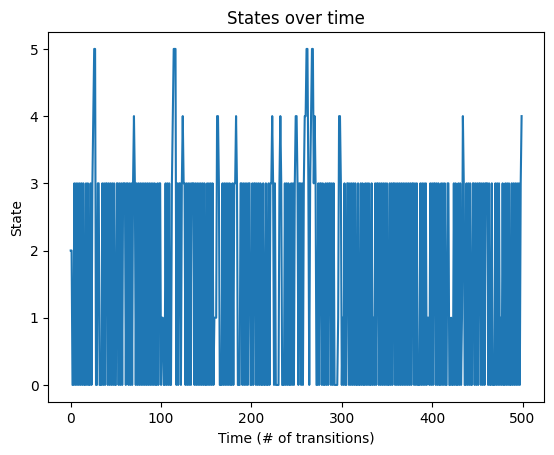

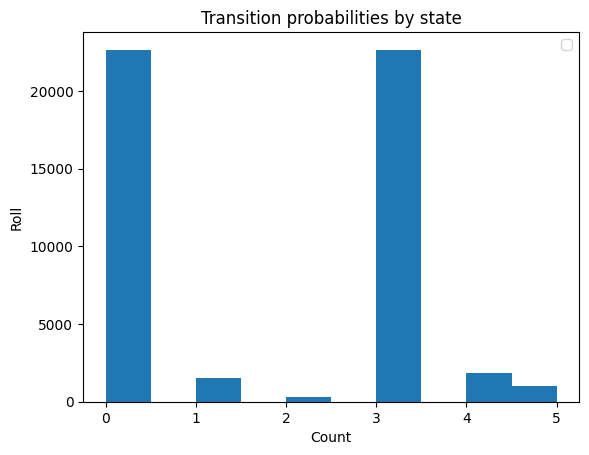

In [3]:

from matplotlib import pyplot as plt
import numpy as np
from hmmlearn import hmm

states = ("S1_o", "S1_d", "S1_u", "S2_o", "S2_d", "S2_u")

generator_model = hmm.CategoricalHMM(n_components=len(states), random_state=42)
initial_state_probabilities = np.array([1.0 if state == "S1_o" else 0.0 for state in states])
initial_state_probabilities = np.array([1/6 for state in states])

with open("dtmc_transitions.txt", "r") as file_content:
    transition_probabilities = np.array(eval(file_content.read()))

emission_probabilities = np.identity(len(states))

generator_model.startprob_ = initial_state_probabilities
generator_model.transmat_ = transition_probabilities
generator_model.emissionprob_ = emission_probabilities

generator_result, generator_states = generator_model.sample(50000)

training_data = generator_result[:generator_result.shape[0] // 2]
validation_data = generator_result[generator_result.shape[0] // 2:]

generator_score = generator_model.score(validation_data)

best_score = best_model = None
number_of_fits = 50
np.random.seed(1)

fig, ax = plt.subplots()
ax.plot(generator_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of transitions)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
counts, state_ids = np.histogram(generator_result)
ax.hist(state_ids[:-1], state_ids, weights=counts)
ax.set_title('Transition probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()
fig.show()

for i in range(number_of_fits):
    model = hmm.CategoricalHMM(n_components=len(states), random_state=i, init_params='ste')
    model.fit(training_data)
    score = model.score(validation_data)
    print(f'Model #{i}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {generator_score}\nBest score:      {best_score}')
initial_state_probabilities

In [5]:
best_model.transmat_